In [1]:
import numpy as np
import pandas as pd 

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
featuresdf = pd.read_csv('features.csv')
storesdf = pd.read_csv('stores.csv')

In [3]:
traindf.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
testdf.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
featuresdf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
storesdf.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
traindf = traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')

In [8]:
traindf.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  int64   
 1   Dept          421570 non-null  int64   
 2   Date          421570 non-null  object  
 3   Weekly_Sales  421570 non-null  float64 
 4   IsHoliday     421570 non-null  bool    
 5   Temperature   421570 non-null  float64 
 6   Fuel_Price    421570 non-null  float64 
 7   MarkDown1     150681 non-null  float64 
 8   MarkDown2     111248 non-null  float64 
 9   MarkDown3     137091 non-null  float64 
 10  MarkDown4     134967 non-null  float64 
 11  MarkDown5     151432 non-null  float64 
 12  CPI           421570 non-null  float64 
 13  Unemployment  421570 non-null  float64 
 14  _merge        421570 non-null  category
 15  Type          421570 non-null  object  
 16  Size          421570 non-null  int64   
dtypes: bool(1), category(1), floa

In [10]:
traindf = traindf.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', '_merge'],axis=1)  
traindf = traindf.loc[traindf['Weekly_Sales']>0]
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   CPI           420212 non-null  float64
 8   Unemployment  420212 non-null  float64
 9   Type          420212 non-null  object 
 10  Size          420212 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.7+ MB


In [11]:
traindf.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [12]:
traindf['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

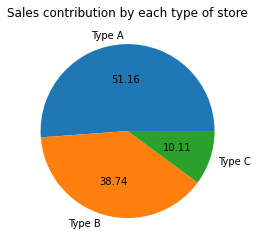

In [13]:
import matplotlib.pyplot as plt

stores = ['Type A', 'Type B', 'Type C']

data = traindf['Type'].value_counts()

fig, ax = plt.subplots()
plt.pie(data, labels = stores, autopct='%.2f')
ax.set_title('Sales contribution by each type of store')
plt.show()

In [14]:
traindf['year'] = pd.DatetimeIndex(traindf['Date']).year

<AxesSubplot:>

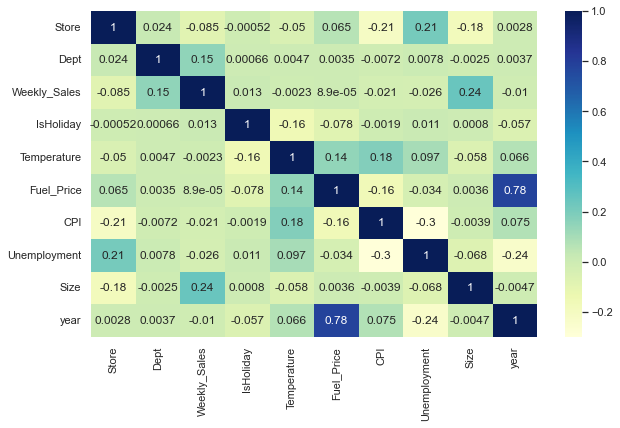

In [15]:
import seaborn as sns

data = traindf
sns.set(rc = {'figure.figsize':(10, 6)})
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='year', ylabel='Fuel_Price'>

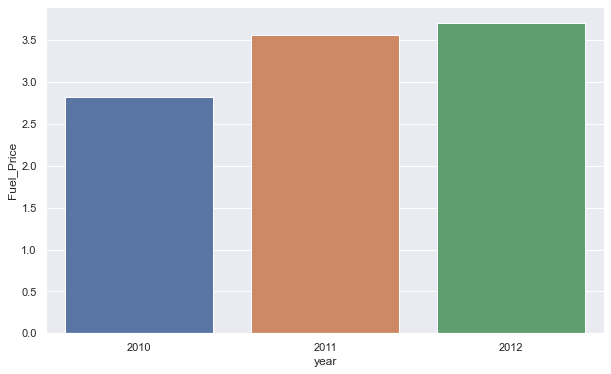

In [16]:
sns.barplot(x="year", y="Fuel_Price", data=data)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

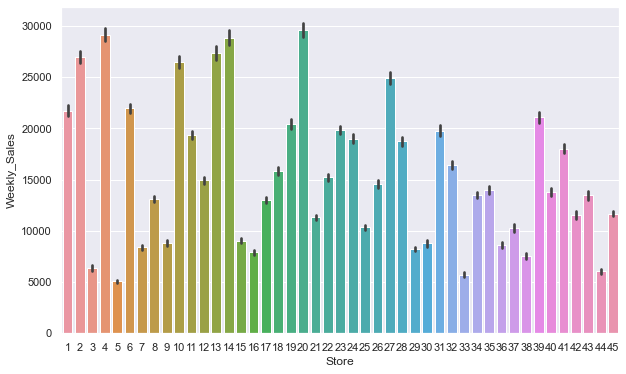

In [17]:
sns.barplot(x='Store', y="Weekly_Sales", data=data)

<AxesSubplot:xlabel='Store', ylabel='Unemployment'>

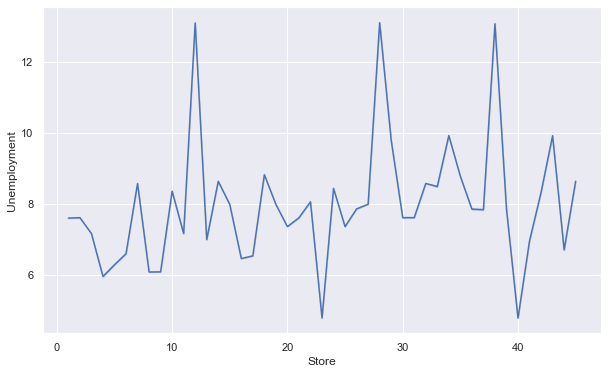

In [18]:
sns.lineplot(x="Store", y="Unemployment", data=data)

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

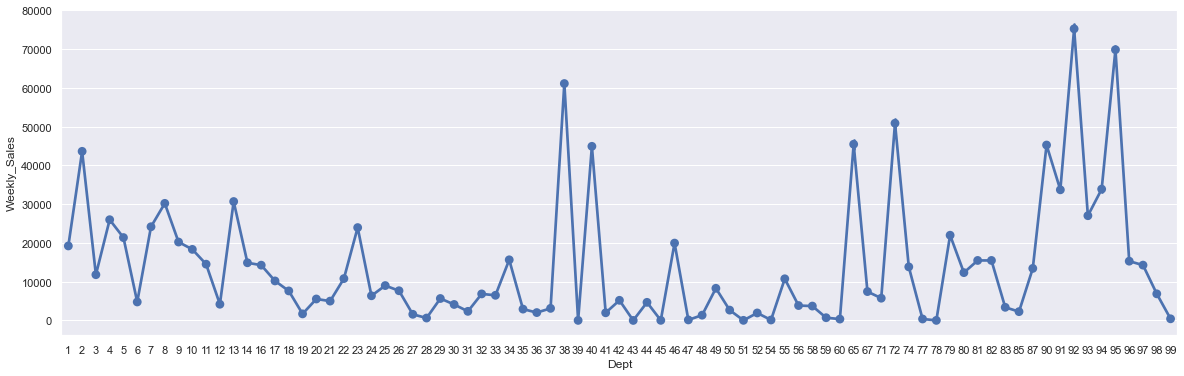

In [20]:
sns.set(rc = {'figure.figsize':(20, 6)})
sns.pointplot(x ='Dept', y = "Weekly_Sales", data = data)

In [21]:
traindf['month'] = pd.DatetimeIndex(traindf['Date']).month
traindf['week'] = pd.DatetimeIndex(traindf['Date']).week

C:\Users\YASH\AppData\Local\Temp\ipykernel_6436\3134273900.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  traindf['week'] = pd.DatetimeIndex(traindf['Date']).week


In [22]:
traindf = traindf.drop(['Date'],axis=1)

<AxesSubplot:xlabel='month'>

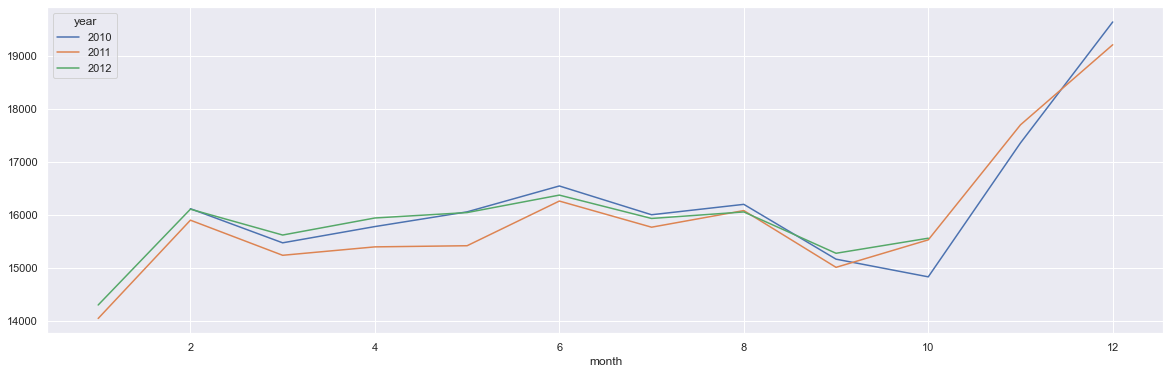

In [23]:
month_wise_sales = pd.pivot_table(traindf, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

traindf['IsHoliday'] = label_encoder.fit_transform(traindf['IsHoliday'])
traindf['Type'] = label_encoder.fit_transform(traindf['Type'])
traindf.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9


<AxesSubplot:>

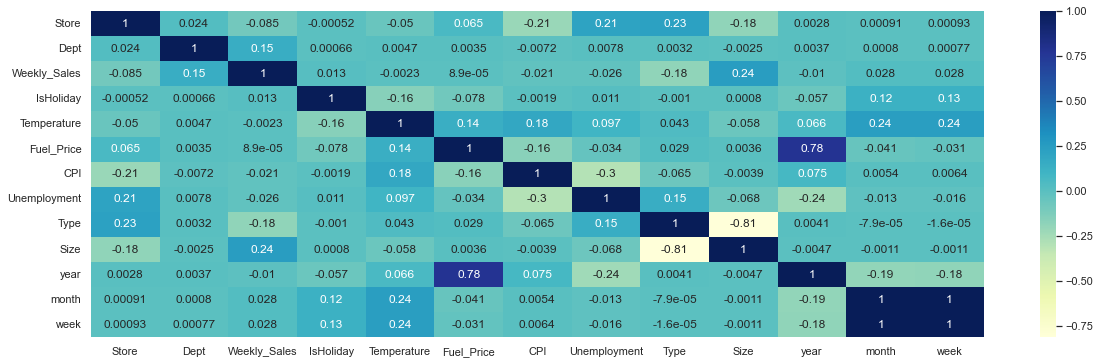

In [25]:
sns.heatmap(traindf.corr(), cmap="YlGnBu", annot=True)

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

X = traindf.drop(['Weekly_Sales'], axis=1)
y= traindf['Weekly_Sales']

In [29]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

In [30]:
from sklearn.model_selection import train_test_split  
F = X.drop(["IsHoliday",'year'],axis=1)
x_train, x_test, y_train, y_test= train_test_split(F, y, test_size= 0.25, random_state=0)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


In [33]:
rf2 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, max_features = 'sqrt', min_samples_split = 10)
rf2.fit(x_train,y_train)
y_pred1 = rf2.predict(x_test)

print("R2 score  :", r2_score(y_test, y_pred))
print("MSE score  :", mean_squared_error(y_test, y_pred1))
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 62845166.705938146
RMSE:  7927.494352311968


In [35]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)

print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9444449403000315
MSE score  : 28941055.95639064
RMSE:  5379.689206300922
